In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

###**Credit Card Fraud Classification**

This notebook demonstrates credit card fraud detection. A binary classifier is trained to perform fraud detection analysis on an credit card transaction dataset.


In [43]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import losses


### Import and explore the dataset


In [27]:
df = pd.read_csv("/creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


Check distribution of data, we see it's a balanced dataset ( Each transaction is labeled as either fraudulent (1) or non-fraudulent (0))

In [29]:
ds_class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [31]:
# drop unneccssary column
df=df.drop(['id'],axis=1, inplace = True)

### Clean data

In [28]:
# separate label and features
ds_features = df.copy()
ds_class = ds_features.pop("Class")

ds_features.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [22]:
# make it array
ds_features = np.array(ds_features).astype('float64')
ds_class = np.array(ds_class)

ds_features

array([[     0.   ,     -0.261,     -0.47 , ...,     -0.081,     -0.151,
         17982.1  ],
       [     1.   ,      0.985,     -0.356, ...,     -0.248,     -0.065,
          6531.37 ],
       [     2.   ,     -0.26 ,     -0.949, ...,     -0.3  ,     -0.245,
          2513.54 ],
       ...,
       [148668.   ,      1.785,     -0.43 , ...,     -0.348,     -0.256,
         19812.19 ],
       [148669.   ,      0.351,     -0.088, ...,     -0.036,      0.408,
          5646.25 ],
       [148670.   ,     -0.381,      0.229, ...,        nan,        nan,
               nan]])

### Prepare for training

In [24]:
# create a normalization layer
normalize = layers.Normalization()
# apply
normalize.adapt(ds_features)

We use 80% data for training and validation, 20% for testing;

In [41]:
from sklearn.model_selection import train_test_split

# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(ds_features, ds_class ,test_size=0.2,random_state=55)

# Create a validation dataset from training data
X_train, X_valid, y_train,y_valid = train_test_split(X_train, y_train ,test_size=0.2,random_state=55)

X_train.shape

(363923, 30)

In [40]:
X_valid.shape

(90981, 30)

### Build model and train

In [74]:
model = keras.Sequential([
      layers.Dense(22, activation='relu'),
      layers.Dense(55, activation='relu'),
      layers.Dense(25, activation='relu'),
      layers.Dense(1, activation='sigmoid')
])

model.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy())

In [76]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 22)                682       
                                                                 
 dense_19 (Dense)            (None, 55)                1265      
                                                                 
 dense_20 (Dense)            (None, 25)                1400      
                                                                 
 dense_21 (Dense)            (None, 1)                 26        
                                                                 
Total params: 3373 (13.18 KB)
Trainable params: 3373 (13.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
# stop when no improve in loss after 3 consecutive epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# training
epochs = 30
bs = 50

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size = bs,
                    validation_data=(X_valid, y_valid),
                    callbacks = [callback])

Epoch 1/30
7279/7279 [==============================] - 34s 5ms/step - loss: 36.2691 - binary_accuracy: 0.7710 - val_loss: 0.6219 - val_binary_accuracy: 0.9609
Epoch 2/30
7279/7279 [==============================] - 33s 4ms/step - loss: 3.8115 - binary_accuracy: 0.8896 - val_loss: 1.0657 - val_binary_accuracy: 0.9310
Epoch 3/30
7279/7279 [==============================] - 31s 4ms/step - loss: 0.6021 - binary_accuracy: 0.9470 - val_loss: 0.0409 - val_binary_accuracy: 0.9847
Epoch 4/30
7279/7279 [==============================] - 40s 5ms/step - loss: 0.0519 - binary_accuracy: 0.9843 - val_loss: 0.0409 - val_binary_accuracy: 0.9905
Epoch 5/30
7279/7279 [==============================] - 33s 4ms/step - loss: 0.1129 - binary_accuracy: 0.9840 - val_loss: 0.0244 - val_binary_accuracy: 0.9952
Epoch 6/30
7279/7279 [==============================] - 34s 5ms/step - loss: 0.0567 - binary_accuracy: 0.9862 - val_loss: 0.0268 - val_binary_accuracy: 0.9919
Epoch 7/30
7279/7279 [=======================

### Results

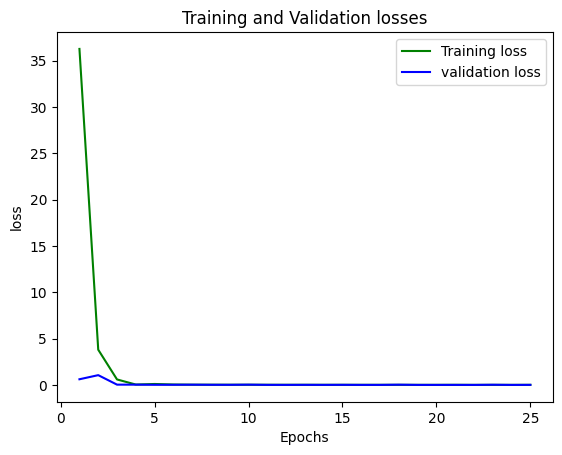

In [77]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

epochs = range(1, len(val_acc) + 1)


plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

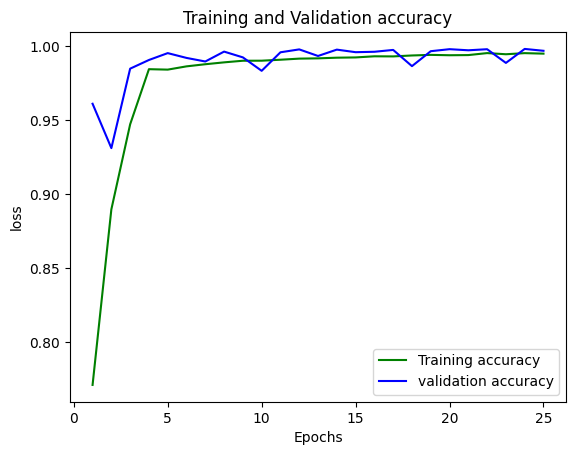

In [78]:
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [79]:
# test accuracy
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

3554/3554 [==============================] - 9s 3ms/step - loss: 0.0157 - binary_accuracy: 0.9967
Loss:  0.015697913244366646
Accuracy:  0.9967465400695801
